In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### We have data of a bunch of stocks, but we are planing to work only on the comapnies like amazon, google, microsoft and apple. So, first step is to pick the data of these companies from a buch of data.

In [3]:
import os

In [4]:
files = os.listdir(r'C:\Users\darsh\OneDrive\Desktop\ML\Stock Analysis\individual_stocks_5yr')

In [6]:
files

['AAL_data.csv',
 'AAPL_data.csv',
 'AAP_data.csv',
 'ABBV_data.csv',
 'ABC_data.csv',
 'ABT_data.csv',
 'ACN_data.csv',
 'ADBE_data.csv',
 'ADI_data.csv',
 'ADM_data.csv',
 'ADP_data.csv',
 'ADSK_data.csv',
 'ADS_data.csv',
 'AEE_data.csv',
 'AEP_data.csv',
 'AES_data.csv',
 'AET_data.csv',
 'AFL_data.csv',
 'AGN_data.csv',
 'AIG_data.csv',
 'AIV_data.csv',
 'AIZ_data.csv',
 'AJG_data.csv',
 'AKAM_data.csv',
 'ALB_data.csv',
 'ALGN_data.csv',
 'ALK_data.csv',
 'ALLE_data.csv',
 'ALL_data.csv',
 'ALXN_data.csv',
 'AMAT_data.csv',
 'AMD_data.csv',
 'AME_data.csv',
 'AMGN_data.csv',
 'AMG_data.csv',
 'AMP_data.csv',
 'AMT_data.csv',
 'AMZN_data.csv',
 'ANDV_data.csv',
 'ANSS_data.csv',
 'ANTM_data.csv',
 'AON_data.csv',
 'AOS_data.csv',
 'APA_data.csv',
 'APC_data.csv',
 'APD_data.csv',
 'APH_data.csv',
 'APTV_data.csv',
 'ARE_data.csv',
 'ARNC_data.csv',
 'ATVI_data.csv',
 'AVB_data.csv',
 'AVGO_data.csv',
 'AVY_data.csv',
 'AWK_data.csv',
 'AXP_data.csv',
 'AYI_data.csv',
 'AZO_data.cs

In [7]:
len(files)

507

In [8]:
company_list = [r'C:\Users\darsh\OneDrive\Desktop\ML\Stock Analysis\individual_stocks_5yr\AAPL_data.csv',
                r'C:\Users\darsh\OneDrive\Desktop\ML\Stock Analysis\individual_stocks_5yr\AMZN_data.csv',
                r'C:\Users\darsh\OneDrive\Desktop\ML\Stock Analysis\individual_stocks_5yr\GOOG_data.csv',
                r'C:\Users\darsh\OneDrive\Desktop\ML\Stock Analysis\individual_stocks_5yr\MSFT_data.csv'
]

In [9]:
company_list

['C:\\Users\\darsh\\OneDrive\\Desktop\\ML\\Stock Analysis\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\darsh\\OneDrive\\Desktop\\ML\\Stock Analysis\\individual_stocks_5yr\\AMZN_data.csv',
 'C:\\Users\\darsh\\OneDrive\\Desktop\\ML\\Stock Analysis\\individual_stocks_5yr\\GOOG_data.csv',
 'C:\\Users\\darsh\\OneDrive\\Desktop\\ML\\Stock Analysis\\individual_stocks_5yr\\MSFT_data.csv']

In [10]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = current_df.append(all_data , ignore_index = True)

In [12]:
all_data


date     open    high       low   close    volume  Name
0     2013-02-08   27.350   27.71   27.3100   27.55  33318306  MSFT
1     2013-02-11   27.650   27.92   27.5000   27.86  32247549  MSFT
2     2013-02-12   27.880   28.00   27.7500   27.88  35990829  MSFT
3     2013-02-13   27.930   28.11   27.8800   28.03  41715530  MSFT
4     2013-02-14   27.920   28.06   27.8700   28.04  32663174  MSFT
...          ...      ...     ...       ...     ...       ...   ...
4747  2018-02-01  167.165  168.62  166.7600  167.78  47230787  AAPL
4748  2018-02-02  166.000  166.80  160.1000  160.50  86593825  AAPL
4749  2018-02-05  159.100  163.88  156.0000  156.49  72738522  AAPL
4750  2018-02-06  154.830  163.72  154.0000  163.03  68243838  AAPL
4751  2018-02-07  163.085  163.40  159.0685  159.54  51608580  AAPL

[4752 rows x 7 columns]

In [13]:
all_data['Name'].unique()

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

In [14]:
### Analysing the closing prices of the stocks

In [15]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [16]:
type(all_data)

pandas.core.frame.DataFrame

In [17]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [18]:
### Need to convert the date datatype

In [19]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [20]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [22]:
tech_list = all_data['Name'].unique()

In [23]:
tech_list

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

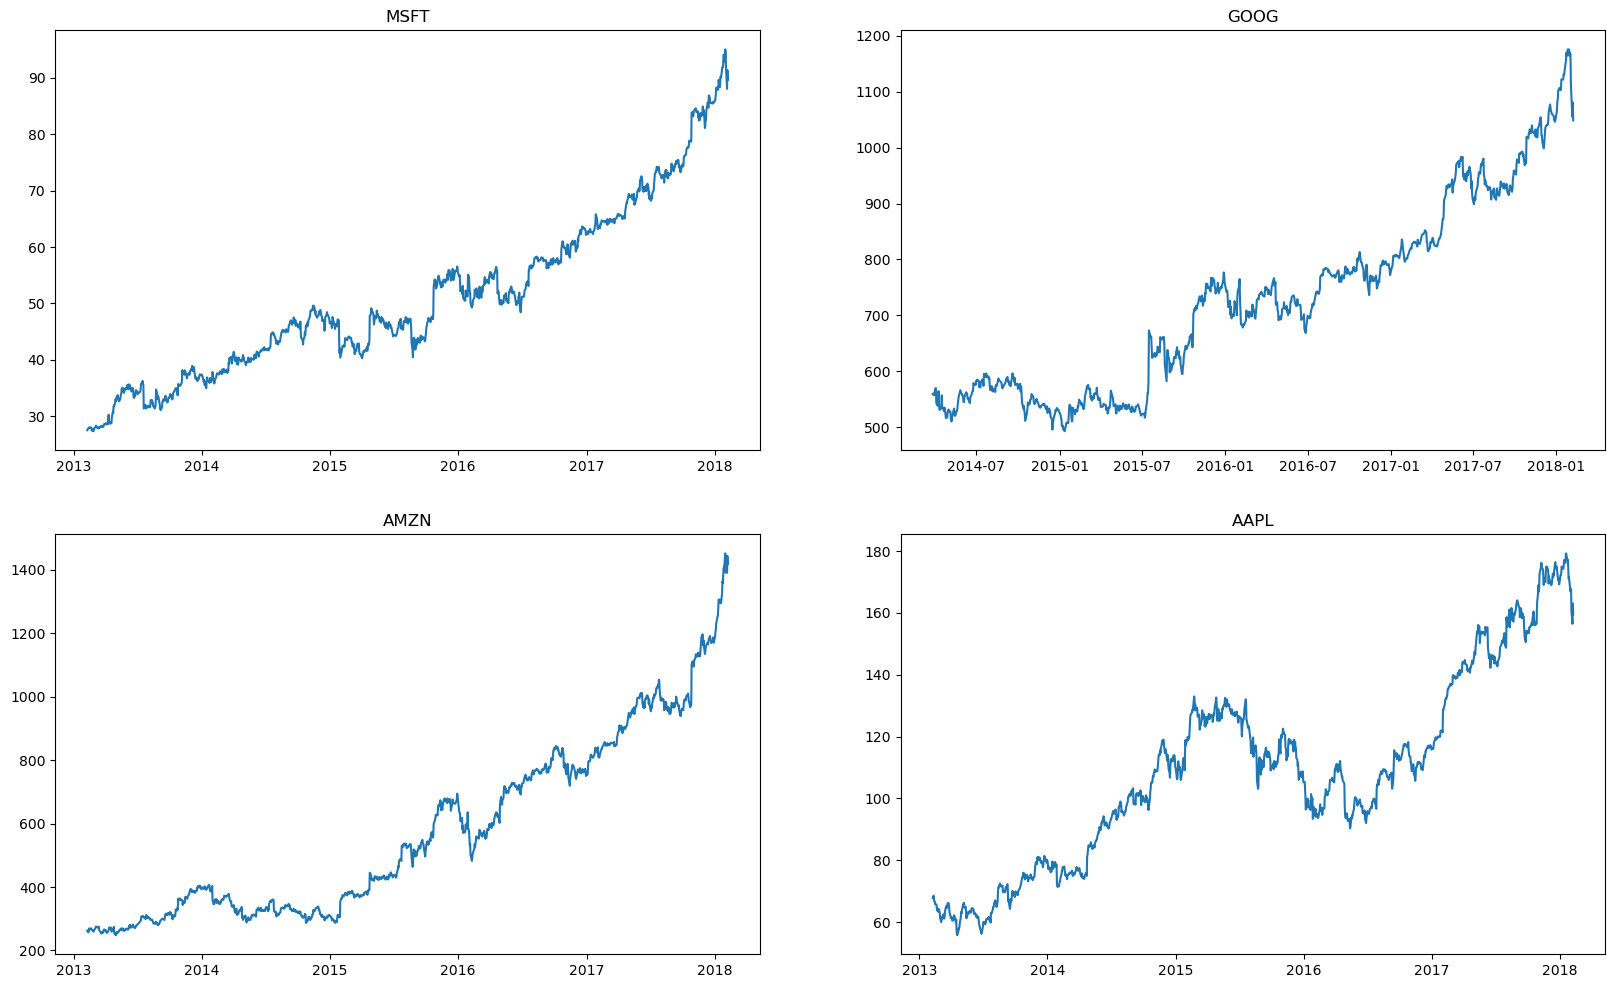

In [26]:
plt.figure(figsize=(20,12))
for index, company in enumerate(tech_list , 1):
    plt.subplot(2, 2, index)
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)

In [27]:
### Analyzing the moving averages

In [30]:
all_data['close'].rolling(window=10).mean().head(13)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
Name: close, dtype: float64

In [31]:
new_data = all_data.copy()

In [32]:
moving_avg = [50,100,200]

for moving in moving_avg:
    new_data['close_'+str(moving)] = new_data['close'].rolling(moving).mean()


In [34]:
new_data.tail(15)

date     open      high       low   close    volume  Name  \
4737 2018-01-18  179.370  180.1000  178.2500  179.26  31193352  AAPL   
4738 2018-01-19  178.610  179.5800  177.4100  178.46  32425067  AAPL   
4739 2018-01-22  177.300  177.7800  176.6016  177.00  27108551  AAPL   
4740 2018-01-23  177.300  179.4400  176.8200  177.04  32689146  AAPL   
4741 2018-01-24  177.250  177.3000  173.2000  174.22  51105090  AAPL   
4742 2018-01-25  174.505  174.9500  170.5300  171.11  41529004  AAPL   
4743 2018-01-26  172.000  172.0000  170.0600  171.51  39143011  AAPL   
4744 2018-01-29  170.160  170.1600  167.0700  167.96  50640406  AAPL   
4745 2018-01-30  165.525  167.3700  164.7000  166.97  46048185  AAPL   
4746 2018-01-31  166.870  168.4417  166.5000  167.43  32478930  AAPL   
4747 2018-02-01  167.165  168.6200  166.7600  167.78  47230787  AAPL   
4748 2018-02-02  166.000  166.8000  160.1000  160.50  86593825  AAPL   
4749 2018-02-05  159.100  163.8800  156.0000  156.49  72738522  AAPL   
4750 2018-02-06  154.830  163.7200  154.0000  163.03  68243838  AAPL   
4751 2018-02-07  163.085  163.4000  159.0685  159.54  51608580  AAPL   

      close_50  close_100  close_200  
4737  173.0654   165.9651  157.94695  
4738  173.1496   166.1511  158.11540  
4739  173.1934   166.3064  158.28030  
4740  173.2094   166.4477  158.44720  
4741  173.1762   166.5564  158.60160  
4742  173.1050   166.6275  158.74130  
4743  173.0558   166.7021  158.89070  
4744  172.9882   166.7609  159.02150  
4745  172.9460   166.8115  159.15110  
4746  172.8726   166.8732  159.27910  
4747  172.8252   166.9647  159.41200  
4748  172.6356   166.9547  159.51110  
4749  172.3026   166.9110  159.58135  
4750  172.0640   166.9448  159.68515  
4751  171.7554   166.9574  159.76465

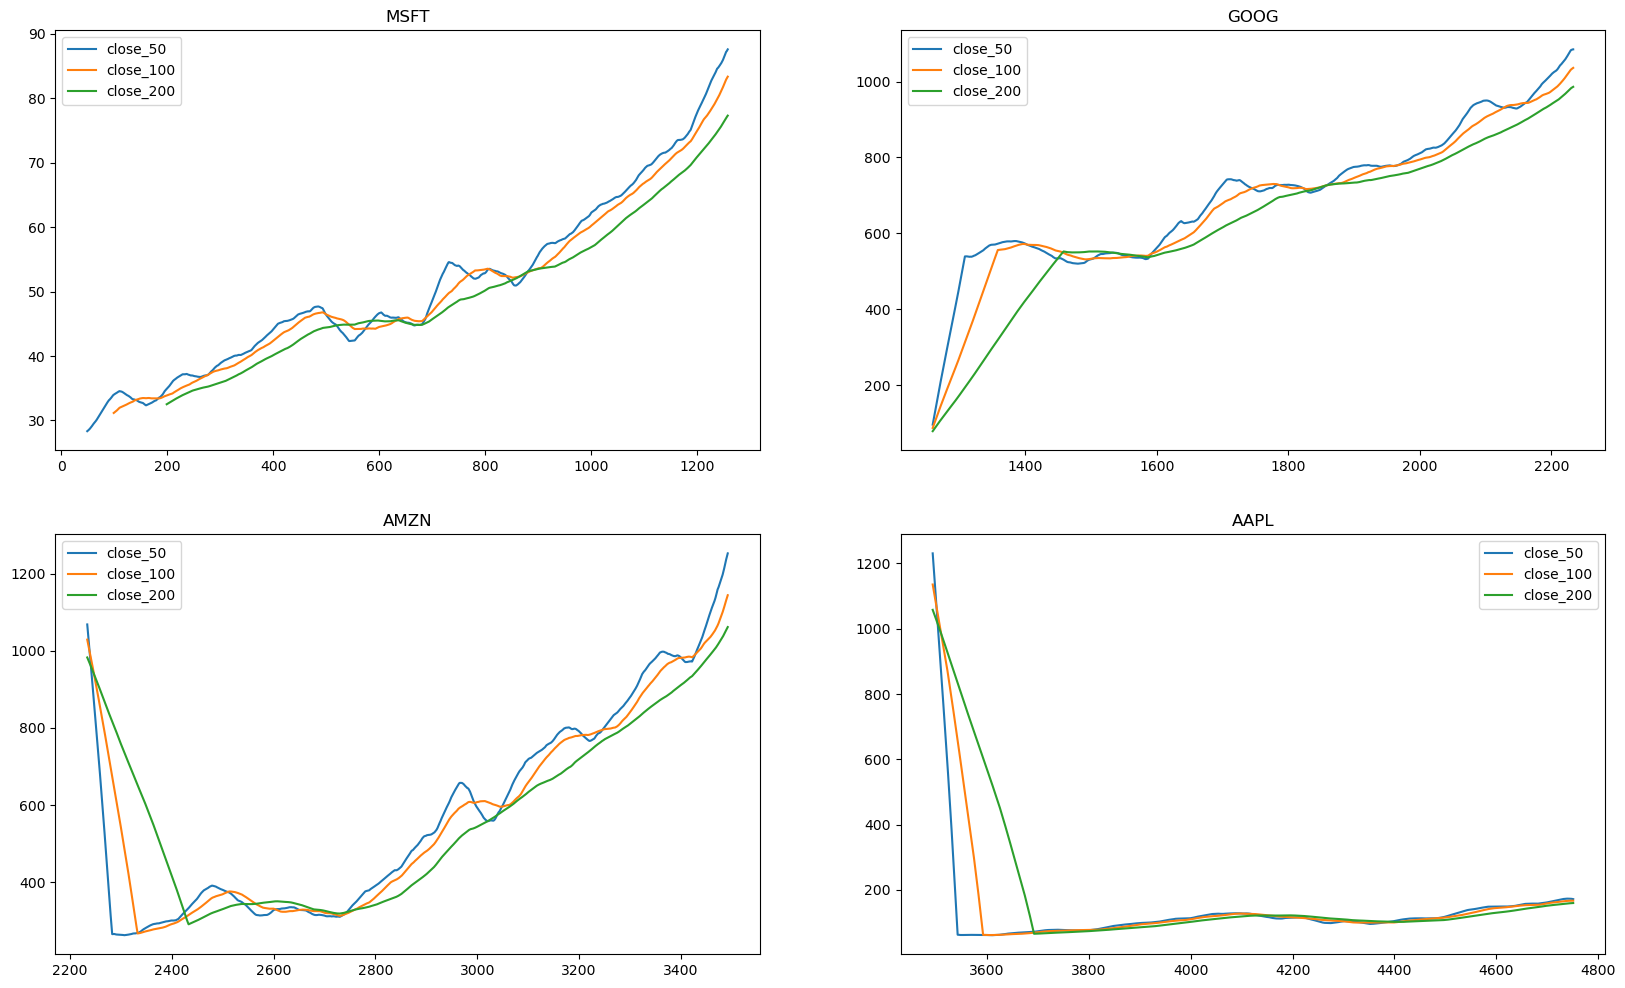

In [36]:
plt.figure(figsize=(20,12))
for index, company in enumerate(tech_list , 1):
    plt.subplot(2, 2, index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_50','close_100', 'close_200']].plot(ax=plt.gca())
    plt.title(company)

In [37]:
### Analyzing the closing price changes of APPLE stock

In [38]:
company_list

['C:\\Users\\darsh\\OneDrive\\Desktop\\ML\\Stock Analysis\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\darsh\\OneDrive\\Desktop\\ML\\Stock Analysis\\individual_stocks_5yr\\AMZN_data.csv',
 'C:\\Users\\darsh\\OneDrive\\Desktop\\ML\\Stock Analysis\\individual_stocks_5yr\\GOOG_data.csv',
 'C:\\Users\\darsh\\OneDrive\\Desktop\\ML\\Stock Analysis\\individual_stocks_5yr\\MSFT_data.csv']

In [40]:
apple = pd.read_csv(r'C:\\Users\\darsh\\OneDrive\\Desktop\\ML\\Stock Analysis\\individual_stocks_5yr\\AAPL_data.csv')

In [41]:
apple.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [42]:
apple['Daily Changes(in %)'] = apple['close'].pct_change()*100

In [43]:
apple.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   Daily Changes(in %)  
0                  NaN  
1             1.042235  
2            -2.506658  
3            -0.190297  
4            -0.089934

In [44]:
import plotly.express as px

In [45]:
px.line(apple , x="date" , y = "Daily Changes(in %)")

In [46]:
### Resampling analysis 

In [48]:
### a..yearly('Y')  , 
###b..quarterly('Q')   ,
###c..monthly('M') ,
###d..weekly basis ('W'), 
###e..Daily_basis('D')  
###f..minutes ('3T') , 
###g..30 second bins('30S')   ,
###h..resample('17min')

In [49]:
apple.dtypes

date                    object
open                   float64
high                   float64
low                    float64
close                  float64
volume                   int64
Name                    object
Daily Changes(in %)    float64
dtype: object

In [50]:
apple['date'] = pd.to_datetime(apple['date'])

In [51]:
apple.dtypes

date                   datetime64[ns]
open                          float64
high                          float64
low                           float64
close                         float64
volume                          int64
Name                           object
Daily Changes(in %)           float64
dtype: object

In [52]:
### When we use pandas dataframe, we need to set date as the row index

In [53]:
apple.head()

date     open     high      low    close     volume  Name  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   Daily Changes(in %)  
0                  NaN  
1             1.042235  
2            -2.506658  
3            -0.190297  
4            -0.089934

In [54]:
apple.set_index('date' , inplace=True)

In [55]:
apple.head()

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

            Daily Changes(in %)  
date                             
2013-02-08                  NaN  
2013-02-11             1.042235  
2013-02-12            -2.506658  
2013-02-13            -0.190297  
2013-02-14            -0.089934

<Axes: xlabel='date'>

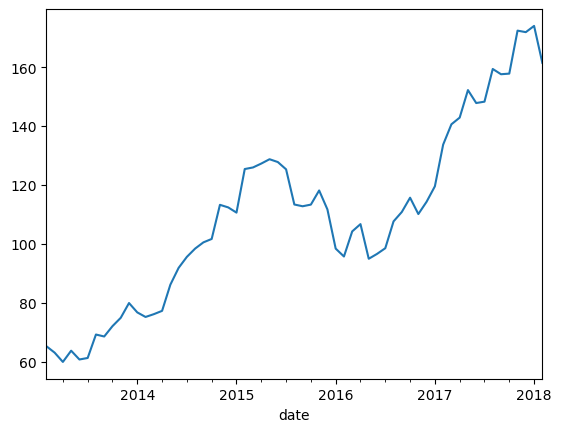

In [57]:
apple['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

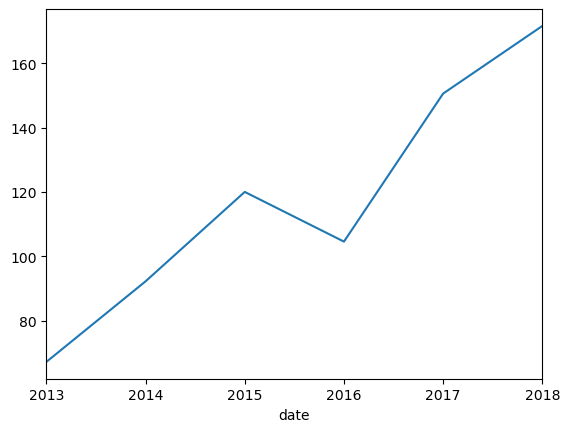

In [58]:
apple['close'].resample('Y').mean().plot()

<Axes: xlabel='date'>

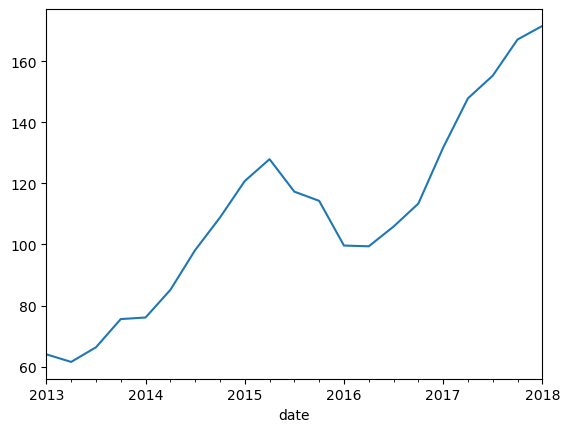

In [59]:
apple['close'].resample('Q').mean().plot()

In [60]:
## Check the coorelation between the closing prices of these companies

In [61]:
company_list

['C:\\Users\\darsh\\OneDrive\\Desktop\\ML\\Stock Analysis\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\darsh\\OneDrive\\Desktop\\ML\\Stock Analysis\\individual_stocks_5yr\\AMZN_data.csv',
 'C:\\Users\\darsh\\OneDrive\\Desktop\\ML\\Stock Analysis\\individual_stocks_5yr\\GOOG_data.csv',
 'C:\\Users\\darsh\\OneDrive\\Desktop\\ML\\Stock Analysis\\individual_stocks_5yr\\MSFT_data.csv']

In [62]:
app = pd.read_csv(company_list[0])
amazon = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
microsoft = pd.read_csv(company_list[3])

In [63]:
app

date      open      high       low     close     volume  Name
0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
2     2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL
3     2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL
4     2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL
...          ...       ...       ...       ...       ...        ...   ...
1254  2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL
1255  2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL
1256  2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL
1257  2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL
1258  2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL

[1259 rows x 7 columns]

In [64]:
### Create an empty dataframe to fit in only the closing prices of these companies

In [65]:
closing_prices = pd.DataFrame()

In [66]:
closing_prices['app_close'] = app['close']
closing_prices['amazon_close'] = amazon['close']
closing_prices['google_close'] = google['close']
closing_prices['microsoft_close'] = microsoft['close']

In [67]:
closing_prices

app_close  amazon_close  google_close  microsoft_close
0       67.8542        261.95        558.46            27.55
1       68.5614        257.21        559.99            27.86
2       66.8428        258.70        556.97            27.88
3       66.7156        269.47        567.16            28.03
4       66.6556        269.24        567.00            28.04
...         ...           ...           ...              ...
1254   167.7800       1390.00           NaN            94.26
1255   160.5000       1429.95           NaN            91.78
1256   156.4900       1390.00           NaN            88.00
1257   163.0300       1442.84           NaN            91.33
1258   159.5400       1416.78           NaN            89.61

[1259 rows x 4 columns]

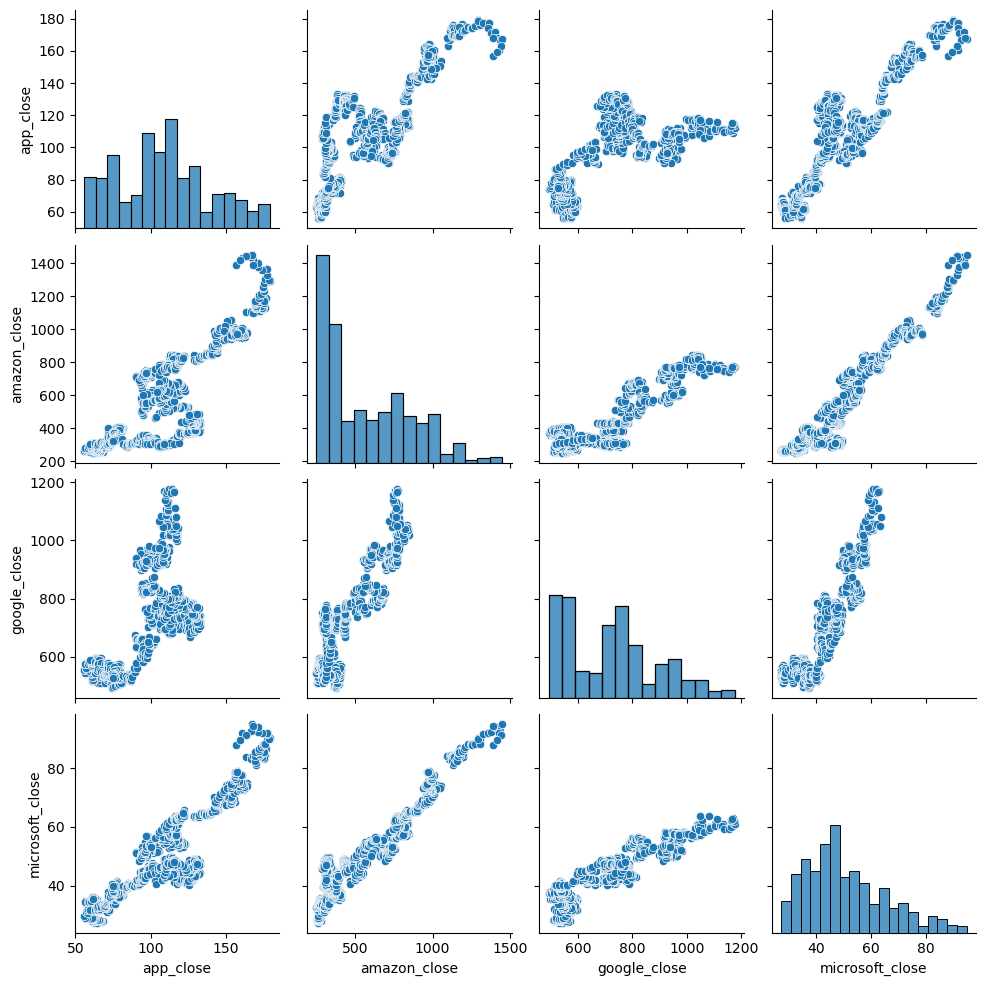

In [68]:
sns.pairplot(closing_prices)

In [69]:
closing_prices.corr()

app_close  amazon_close  google_close  microsoft_close
app_close         1.000000      0.819078      0.640522         0.899689
amazon_close      0.819078      1.000000      0.888456         0.955977
google_close      0.640522      0.888456      1.000000         0.907011
microsoft_close   0.899689      0.955977      0.907011         1.000000

<Axes: >

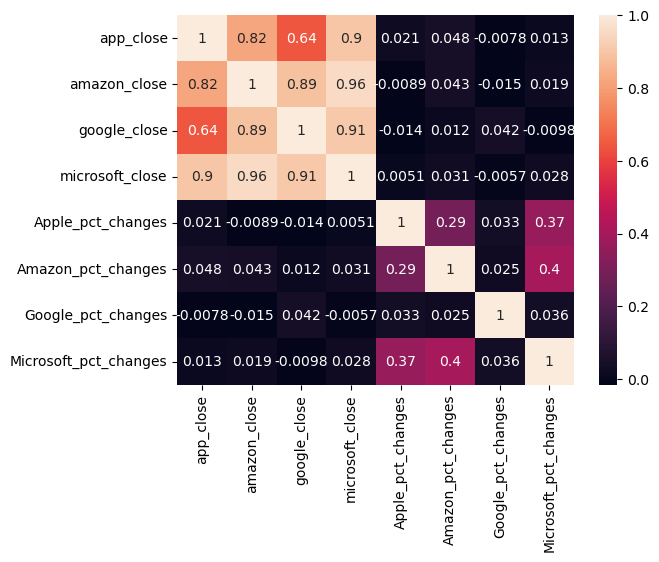

In [87]:
sns.heatmap(closing_prices.corr(), annot=True,)

In [71]:
## Analzing whether Daily change in Closing price of stocks are co-related or not !

In [72]:
closing_prices

app_close  amazon_close  google_close  microsoft_close
0       67.8542        261.95        558.46            27.55
1       68.5614        257.21        559.99            27.86
2       66.8428        258.70        556.97            27.88
3       66.7156        269.47        567.16            28.03
4       66.6556        269.24        567.00            28.04
...         ...           ...           ...              ...
1254   167.7800       1390.00           NaN            94.26
1255   160.5000       1429.95           NaN            91.78
1256   156.4900       1390.00           NaN            88.00
1257   163.0300       1442.84           NaN            91.33
1258   159.5400       1416.78           NaN            89.61

[1259 rows x 4 columns]

In [77]:
closing_prices['Apple_pct_changes'] = closing_prices['app_close'].pct_change()*100
closing_prices['Amazon_pct_changes'] = closing_prices['amazon_close'].pct_change()*100
closing_prices['Google_pct_changes'] = closing_prices['google_close'].pct_change()*100
closing_prices['Microsoft_pct_changes'] = closing_prices['microsoft_close'].pct_change()*100

In [78]:
closing_prices.head()

app_close  amazon_close  google_close  microsoft_close  Apple_pct_changes  \
0    67.8542        261.95        558.46            27.55                NaN   
1    68.5614        257.21        559.99            27.86           1.042235   
2    66.8428        258.70        556.97            27.88          -2.506658   
3    66.7156        269.47        567.16            28.03          -0.190297   
4    66.6556        269.24        567.00            28.04          -0.089934   

   Amazon_pct_changes  Google_pct_changes  Microsoft_pct_changes  
0                 NaN                 NaN                    NaN  
1           -1.809506            0.273968               1.125227  
2            0.579293           -0.539295               0.071788  
3            4.163123            1.829542               0.538020  
4           -0.085353           -0.028211               0.035676

In [79]:
closing_prices.columns

Index(['app_close', 'amazon_close', 'google_close', 'microsoft_close',
       'Apple_pct_changes', 'Amazon_pct_changes', 'Google_pct_changes',
       'Microsoft_pct_changes'],
      dtype='object')

In [81]:
final_close = closing_prices[['Apple_pct_changes', 'Amazon_pct_changes', 'Google_pct_changes',
       'Microsoft_pct_changes']]

In [82]:
final_close

Apple_pct_changes  Amazon_pct_changes  Google_pct_changes  \
0                   NaN                 NaN                 NaN   
1              1.042235           -1.809506            0.273968   
2             -2.506658            0.579293           -0.539295   
3             -0.190297            4.163123            1.829542   
4             -0.089934           -0.085353           -0.028211   
...                 ...                 ...                 ...   
1254           0.209043           -4.196734            0.000000   
1255          -4.339015            2.874101            0.000000   
1256          -2.498442           -2.793804            0.000000   
1257           4.179181            3.801439            0.000000   
1258          -2.140710           -1.806160            0.000000   

      Microsoft_pct_changes  
0                       NaN  
1                  1.125227  
2                  0.071788  
3                  0.538020  
4                  0.035676  
...                     ...  
1254              -0.789391  
1255              -2.631021  
1256              -4.118544  
1257               3.784091  
1258              -1.883280  

[1259 rows x 4 columns]

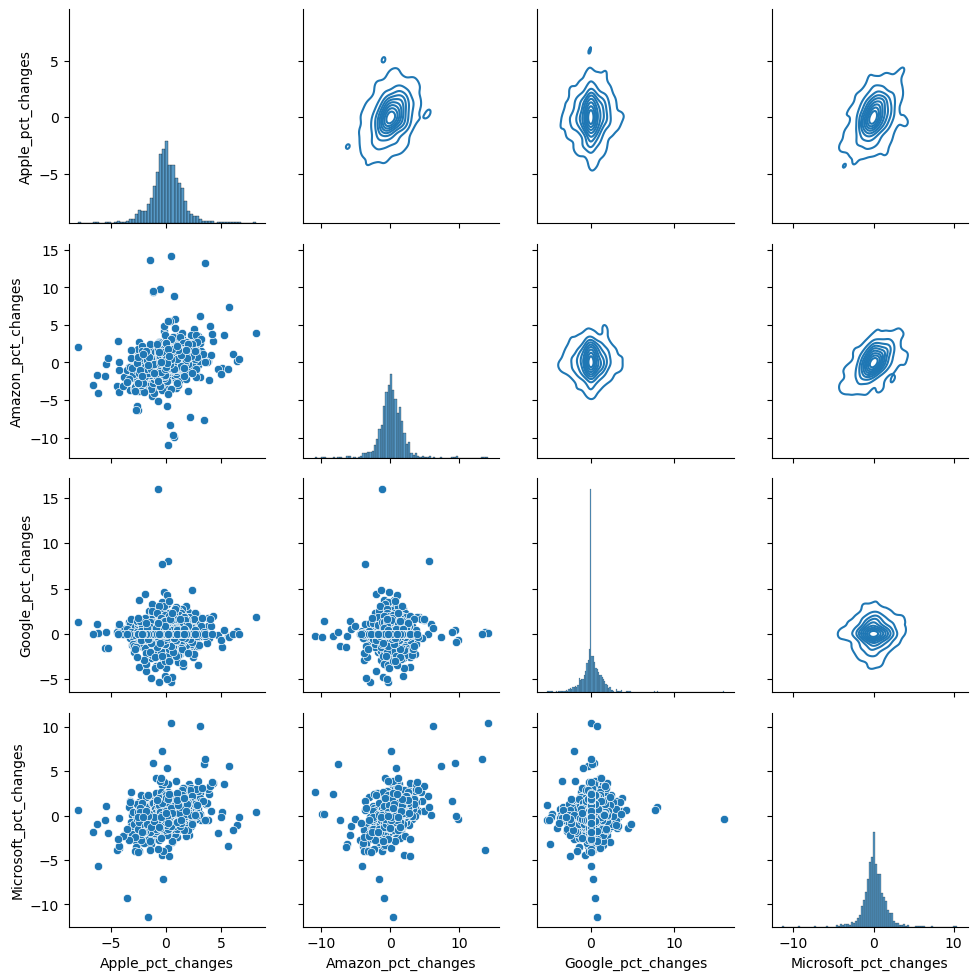

In [83]:
g = sns.PairGrid(data= final_close)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [84]:
final_close.corr()

Apple_pct_changes  Amazon_pct_changes  \
Apple_pct_changes               1.000000            0.287659   
Amazon_pct_changes              0.287659            1.000000   
Google_pct_changes              0.032996            0.025323   
Microsoft_pct_changes           0.366598            0.402678   

                       Google_pct_changes  Microsoft_pct_changes  
Apple_pct_changes                0.032996               0.366598  
Amazon_pct_changes               0.025323               0.402678  
Google_pct_changes               1.000000               0.036436  
Microsoft_pct_changes            0.036436               1.000000

<Axes: >

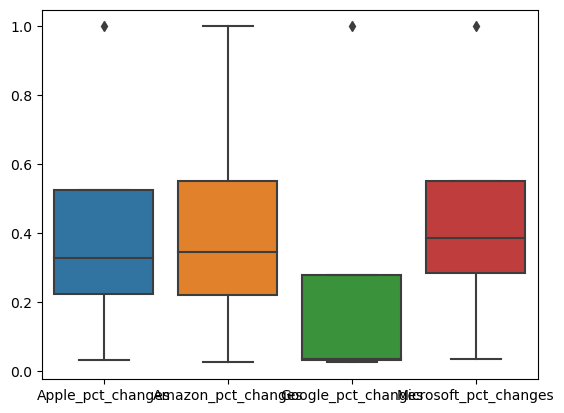

In [89]:
sns.boxplot(final_close.corr())